## Introduction

In notebook 1, data has been extracted for our target city (Vancouver, Canada). In notebook 2, Data cleaning, Exploratory Data Analysis and Feature Engineering will be performed on the data filtered and stored from part 1. We will start by importing required libararies and saved .csv files from previous notebook.

## Importing

**Importing Libraries:** The first step is to import the required libraries for this notebook as performed below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import math
import ast
import string

from collections import Counter

import nltk
nltk.download('stopwords') # for stopwords like a, I
nltk.download('wordnet') # for meaning of words
nltk.download('punkt') # for punctuation
nltk.download('vader_lexicon') # import the nltk vader lexicon

from nltk.corpus import stopwords 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer


# to display all columns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'plotly'

**Importing data:** 2 data files were saved in Part 1 which contained filtered data from json files related to restaurants in Vancouver, British Columbia. These files have been imported from the `data` folder.

In [ ]:
# import the files
restaurants_df = pd.read_csv(r'data\vancouver_restaurants.csv')
reviews_df = pd.read_csv(r'data\vancouver_restaurants_reviews.csv')

## Exploring the Dataset

This step involves looking into the dataset, the structure, missing values and duplicate data. Analyzing the data structure can give valuable insights about the data types which might have to be changed or columns that need to be split or joined for more effective use.

To view the data, the head() function will be used.

**Restaurants Dataset:**

In [ ]:
# view the first 2 rows of restaurant data to get an idea about data
restaurants_df.head(2)

The next step is to check the completeness of data to see whether it matches with the data extracted in Part 1. 

In [ ]:
# sanity check
# check the shape of data
print(f'Number of Restaurants: {restaurants_df.shape[0]: ,}')
print(f'Number of features: {restaurants_df.shape[1]: ,}')

There are same number of rows and columns as there were in previous notebook. Same check has been performed for reviews data below.

**Reviews Dataset:**

In [ ]:
# view the few rows of reviews data
reviews_df.head(2)

In [ ]:
# check size of data
print(f'Number of Reviews: {reviews_df.shape[0]: ,}')
print(f'Number of features: {reviews_df.shape[1]: ,}')

Number of reviews and columns match with our extracted reviews from the dataset. Next step is to look at dataframe structure and data dictionary.

### Dataframe Structure and Dictionary

To view the structure of dataframe, .info() function will be used to get more insights on the structure of dataframe.

**Restaurants Dataset Structure:**

In [ ]:
# structure of the dataframe
restaurants_df.info()

The vancouver_restaurants contains 14 columns and 4,749 rows which are properly indexed from 0 to 4,748. The data types for the columns consist of object, integer and float.

**Data Dictionary:**
The information that each column provides is taken from __[Yelp Documentation](https://www.yelp.com/dataset/documentation/main)__ here and is given below:
- **business_id:** string, 22 character unique string business id
- **name:** string, the business's name
- **address:** string, the full address of the business
- **city:** string, the city
- **state:** string, 2 character state code, if applicable
- **postal_code:** string, the postal code
- **latitude:** float, latitude
- **longitude:** float, longitude
- **stars:** float, star rating, rounded to half-stars
- **review_count:** integer, number of reviews
- **is_open:** integer, 0 or 1 for closed or open, respectively
- **attributes:** object, business attributes to values. note: some attribute values might be objects
- **categories:** an array of strings of business categories
- **hours:** an object of key day to value hours, hours are using a 24hr clock

**Review Dataset Structure:**

In [ ]:
# structure of the dataframe
reviews_df.info()

The vancouver_restaurants contains 9 columns and  rows which are properly indexed from 0 to 322,251. The data types for the columns consist of object, integer and float.

**Data Dictionary:**
The information that each column provides is taken from __[Yelp Documentation](https://www.yelp.com/dataset/documentation/main)__ here and is given below:
- **review_id:** string, 22 character unique review id
- **user_id:** string, 22 character unique user id
- **business_id:** string, 22 character unique string business id, maps to business in business dataset
- **stars:** integer, star rating
- **date:** string, date formatted YYYY-MM-DD
- **text:** string, the review itself
- **useful:** integer, number of useful votes received
- **funny:** integer, number of funny votes received
- **cool:** integer, number of cool votes received

The data type for date column is object which has been changed to datetime while cleaning the data.

### Cleaning the data

In this step, we will be checking the dataset for null values and duplicate data. We will also impute/remove the missing values. As a last step in cleaning the data, we will remove the columns which are not required for the analysis.

#### 1. Restaurants Data

**Missing Data:** As a first step in cleaning the data, we will check for any missing/null values in the dataset.

In [ ]:
# checking missing values as number
restaurants_df.isna().sum()

In [ ]:
# checking missing values as percentage
restaurants_df.isna().sum()/restaurants_df.shape[0]*100

We can see missing values in following fields:

1. **address:** .5%(23) values are missing from the data. These missing values can be filled by searching the Restaurant name or Geographical coordinates. As the information can be extracted from geographical cordinates, this column is not required in analysis and has been dropped.
2. **postal_code:** .2%(9) values are missing from the data. The missing postal codes can be found and filled in the same way as address by geographical coordinates. But, this column is not providing any additional information for the purspose of this project and has been dropped.
3. **hours:** 17%(797) of data is missing from this field which is significant. However, it is time consuming to search and may not provide any additional insight. Hence, for this analysis and time constraints this column has been dropped.
4. **attributes:** 1.4%(67) This column provides details about business attributes like good for kids, parking, dress-code, price range, ambience etc. The number of restaurants missing this data field is not high but the list of attributes is varying for each restaurant. There could be 2 approaches to this issue:
    - rows with missing values can be dropped 
    - the entire column can be dropped if it is not to be used in the analysis
    
Since this data field contains vital information, it would be better to remove the rows which have missing data.

Concisely, from restaurants_df, columns that will be dropped at this point are:

- address
- postal_code
- hours

As our analysis is limited to restaurants in Vancouver, British Columbia, these two columns will be dropped
- city
- state

In [ ]:
# drop the columns
restaurants_df.drop(columns=['address', 'postal_code', 'hours', 'city', 'state'], inplace=True)

In [ ]:
# drop the rows with missing data for attributes column
restaurants_df.dropna(subset=['attributes'], inplace=True)

# drop index
restaurants_df = restaurants_df.reset_index(drop=True)

In [ ]:
# sanity check
restaurants_df.isna().sum()

The above check is to make sure there are no missing data in dataset now. 

**Duplicate Data:** Next, the dataset will be checked for duplicate data.

In [ ]:
# check for duplicate data
restaurants_df.duplicated().sum()

As can be seen from above, there is no duplicate data in the restaurants dataset. Hence, we could move to the next step.

In [ ]:
# check shape of the data
print(f'Number of Restaurants: {restaurants_df.shape[0]}')
print(f'Number of Features: {restaurants_df.shape[1]}')

#### 2. Reviews Data
Next, the reviews dataset will be reviewed for missing and duplicate data.

**Missing Data:**

In [ ]:
# check for missing values
reviews_df.isna().sum()

There are no missing values in the reviews dataset. So we will move to the next step, which is reviewing the dataset for duplicate data.

**Duplicate Data:**

In [ ]:
# check for duplicate data
reviews_df.duplicated().sum()

We noted that there are no duplicate rows or missing values in our data. 

With the above two steps, the data seems clean and as a next step, EDA will be performed on original data provided followed by Feature Engineering and EDA on new columns.

## Exploratory Data Analysis

To understand the data better, EDA will be performed. Target variable for our analysis is **'is_open'** which has two values, '0' and '1' where '0' represents closed restaurants and '1' represents open restaurants.

We have used graphical visualisations to understand any trends, significant fields, any outliers or anomalies, and relationship of various features with our target variable.

**1. is_open:** First step is to look at distribution of our target variable for any class imbalance.

In [ ]:
# check open and closed restaurants
restaurants_df['is_open'].value_counts()/restaurants_df.shape[0]

In [ ]:
# plot the graph for open and closed classes
plt.style.use('ggplot')
plt.figure(figsize=(20,6))
(restaurants_df['is_open'].value_counts()/restaurants_df.shape[0]).plot(kind='bar', color='cornflowerblue')
plt.xlabel('Open or Closed', size=14)
plt.ylabel('Percentage of Restaurants', size=14)
plt.title('Distribution of Open & Closed Restaurants', size=16)
plt.xticks(rotation=0, size=12)
plt.yticks(size=12)
sns.despine()
plt.show()

The above visualization shows a slight imbalance with 59% Open Restaurants and 41% Closed Restaurants but nothing major to have any intervention.

**2. `name`:** values in this field will be looked at next:

In [ ]:
# check the values in name field
restaurants_df['name'].value_counts()

The above counts shows some particular restaurant names being repeated multiple times and all of these are restaurants chains, e.g. McDonald's, Tim Hortons, Subway etc. which generally have many outlets in a single city. To pull out the information from this field, feature `is_chain` will be created for which value '1' will represent restaurant is a part of chain and for that restaurant's name will be checked. If it's being repeated more than once in the data, it will be considered as a chain restaurant.

In [ ]:
# get the counts of all restaurant name in a dataframe
chain_df = restaurants_df['name'].value_counts().to_frame().rename(columns = {'name':'count'})

# view the dataframe
chain_df.head()

In [ ]:
# get the list of restaurants whose count is greater than 1
chain_list = list(chain_df[chain_df['count'] > 1].index)
len(chain_list)

In [ ]:
# total chain restaurants
chain_df[chain_df['count'] > 1].sum()

There are 956 restaurants that are a part of 282 restaurant chains within Vancouver. So, this column will be added to the dataset and  `name` column will be dropped.

In [ ]:
restaurants_df['is_chain'] = restaurants_df['name'].apply(lambda x: 1 if (x in chain_list) else 0)

# sanity check
print('Number of chain restaurants: ', restaurants_df['is_chain'].sum())

This number matches with the initial calculation. Next, name column will be dropped and 'is_chain' column will be analyzed.

In [ ]:
# drop the name field
restaurants_df.drop(columns=['name'], inplace=True)

In [ ]:
# chain restaurants open/closed
restaurants_df[restaurants_df['is_chain']==1]['is_open'].value_counts().sort_index(ascending=True)/restaurants_df[restaurants_df['is_chain']==1].shape[0]

In [ ]:
# for non-chain restaurants open/closed
restaurants_df[restaurants_df['is_chain']==0]['is_open'].value_counts().sort_index(ascending=True)/restaurants_df[restaurants_df['is_chain']==0].shape[0]

In [ ]:
# plot distribution of chain and non-chain Restaurants
plt.style.use('ggplot')
n = 2
fig, ax = plt.subplots(figsize=(20,6))
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, restaurants_df[restaurants_df['is_chain']==1]['is_open'].value_counts().sort_index(ascending=True)/restaurants_df[restaurants_df['is_chain']==1].shape[0],\
       bar_width, alpha=opacity, color='cornflowerblue', label='Chain')
ax.bar(index+bar_width, restaurants_df[restaurants_df['is_chain']==0]['is_open'].value_counts().sort_index(ascending=True)/restaurants_df[restaurants_df['is_chain']==0].shape[0],\
       bar_width, alpha=opacity, color='orange', label='No Chain')
ax.set_xlabel('Closed and Open Restaurants', size=14)
ax.set_ylabel('Percentage of Restaurants', size=14)
ax.set_title('Chain Restaurant Distribution', size=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Closed', 'Open'))
ax.legend()
plt.show()

Looking at the graph above, chain restaurants do not close that often and it's better to invest in them as their chances of closing are less compared to non-chain restaurants. Out of the total chain restaurants, 28% were closed and out of total non-chain restaurants 45% were closed.

**3. Latitude & Longitude:**

For Geographical location trends, we will plot the open and closed restaurants using plotly. We will use 'is_open' as value for color, it's a binary field, therefore color will have 2 extreme values on the scale. For size of the dots, I have used review_count that determines the popularity of a restaurant(good/bad).

In [ ]:
#plot the geographical coordinates of restaurants
fig = px.scatter_mapbox(restaurants_df, lat='latitude', lon='longitude', color='is_open', size='review_count',\
                        size_max=15, zoom=12)
fig.update_layout(mapbox_style="carto-positron")
fig.show()

Looking at the geographical visualization of restaurants in the city of Vancouver, most of the restaurant businesses were concentrated in Downtown Vancouver, which is the central business district. There is no clear trend based on the geographic cordinates but looking at the size of dots which represents review count, most of the closed restaurants have received fewer review counts as compared to the restaurants in their vicinity.

**4. stars:** Next, distribution of stars for both closed and open restaurants will be analyzed.

In [ ]:
# plot distribution of stars in Open and Closed Restaurants
plt.style.use('ggplot')
n = 9
fig, ax = plt.subplots(figsize=(20,6))
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, restaurants_df[restaurants_df['is_open']==1]['stars'].value_counts().sort_index(ascending=True),\
       bar_width, alpha=opacity, color='cornflowerblue', label='Open')
ax.bar(index+bar_width, restaurants_df[restaurants_df['is_open']==0]['stars'].value_counts().sort_index(ascending=True),\
       bar_width, alpha=opacity, color='orange', label='Closed')
ax.set_xlabel('Stars', size=14)
ax.set_ylabel('Number of Restaurants', size=14)
ax.set_title('Distribution of Stars for Open & Closed Restaurants', size=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0'))
ax.legend()
plt.show()

In [ ]:
plt.subplots(1,2, figsize=(20,2))

plt.subplot(1,2,1)
sns.boxplot(x=restaurants_df[restaurants_df['is_open']==1]['stars'], color='cornflowerblue')
plt.title('Plot showing interquartile range for stars in Open Class')

plt.subplot(1,2,2)
sns.boxplot(x=restaurants_df[restaurants_df['is_open']==0]['stars'], color='orange')
plt.title('Plot showing interquartile range for stars in Closed Class')

plt.show()

There is no clear trend based on stars given to a restaurant. Both open and closed restaurants have higher numbers between 3 and 4. It will be interesting to compare the restaurants stars with the ones in their vicinity to better analyze their performance based on stars and whether this field helps in predicting the success of a restaurant.

**5. review_count:** For 'review_count' column, .describe() function will be used to analyze the various summary statistics. These statistics can give a holistic view of data in a column.

In [ ]:
# check statistics for review_count
restaurants_df.groupby('is_open')['review_count'].describe()

By looking at these values above, we can clearly see review_count has low value for closed restaurants as compared to the open restaurants. Average number of reviews received by closed restaurants are 39 and for open restaurants it is 84 which is expected as their age might be less than open restaurants. This could also be due to the reason that users might have found these restaurants delivering usual experience as reviews are generally posted by customers who are either extremely satisfied or dissatisfied.

**6. attributes:** Next, values for `attributes` will be analyzed.

In [ ]:
# view the attributes field
restaurants_df['attributes']

There are different variations of dictionary with different attributes listed for each restaurant. Next, we will find the list of attributes that are listed and some of them can be used to make new features.

In next step, attributes dictionary will be made to get the list of all attributes and count of restaurants for which these attributes are listed.

In [ ]:
type(restaurants_df['attributes'][0])

In [ ]:
# converting string to dictionary
restaurants_df['attributes'] = restaurants_df['attributes'].apply(lambda x:ast.literal_eval(x))

In [ ]:
# attributes dictionary to get 
attributes_dict = {}

for i, restaurant in restaurants_df.iterrows():
    # to exclude NaN values for string
    if restaurant['attributes'] == restaurant['attributes']:
        
        res_attr = restaurant['attributes']
        
        # loop through each attribute listed for the restaurant
        for attribute in res_attr:
            # add index to attribute if it's given for a restaurant
            try:
                attributes_dict[attribute] += [i]
            except:
                attributes_dict[attribute] = [i] 

# dictionary to dataframe
key_df = pd.DataFrame(columns=['Attribute', 'Count'])
i=0
for key in attributes_dict.keys():
    key_df.loc[i,'Attribute'] = key
    key_df.loc[i,'Count'] = len(attributes_dict[key])
    i+=1

# display attributes list with count of rows
key_df.sort_values(by='Count', ascending=False)

We see that there are differnt combinations of 35 attributes and for some attributes there are subsets like 'Ambience', 'BusinessParking', 'GoodForMeal' have a dictionary for its value. We also see, some attributes are more common than others. Also, for missing attributes, we can not make a conclusion that restaurant is missing that attribute. for example, if a business has no 'RestaurantsGoodForGroups' attribute, it could not be concluded that this business is not good for groups, but only that we have no information on this attribute. Therefore, if we wish to compare businesses and include all attributes in the comparison, we will always lose significant parts of the data. But we can check for few most common attributes, like, 'RestaurantsTakeOut', 'RestaurantsDelivery', 'OutdoorSeating', 'RestaurantsPriceRange2' and 'RestaurantsReservations', 'RestaurantsGoodForGroups' and 'GoodForKids' in predicting the closure of a restaurant. Most of these attributes have binary value 'True' or 'False'. For price, which has numbers as value, missing values can be imputed with mode value.

Total number of attributes shared by restaurant will also be extracted to analyze if it has any impact on the target variable.

List of the selected attributes will be made and then all restaurants will be checked if they have that attribute to assign it's value to the new attribute column.

In [ ]:
# list of selected attributes
attributes_list = ['RestaurantsTakeOut', 'RestaurantsDelivery', 'OutdoorSeating', 'RestaurantsPriceRange2',\
                    'RestaurantsReservations', 'RestaurantsGoodForGroups', 'GoodForKids']

# loop through all restaurants, 
for i, restaurant in restaurants_df.iterrows():
    
    # check for NaN values, in case NaN it will always be false
    if restaurant['attributes'] == restaurant['attributes']:
        
        restaurant_attr = restaurants_df.loc[i, 'attributes']
        
        # loop through attributes list
        for attribute in attributes_list:
            
            # check if attribute is mentioned for the current restaurant
            if attribute in restaurant_attr.keys():
                
                # assign the value for the restaurant in attribute column
                restaurants_df.loc[i, attribute] = restaurant_attr[attribute]
                
        # assign total number of attributes for this restaurant
        restaurants_df.loc[i, 'Num_of_attributes_shared'] = len(restaurant_attr.keys())
        
# view the dataset
restaurants_df.head(2)

In [ ]:
# check the attributes
restaurants_df['RestaurantsTakeOut'].value_counts()

We noted that there is 'None' value for 25 rows which does not add any value. Next, all none values will be replaced by NaN to make it easier to impute or remove the values.

In [ ]:
# replace None with nan values
restaurants_df.replace('None', np.NaN, inplace=True)

All these boolean columns will be converted to `attribute_True` or `attribute_False`. We could also use One hot encoder and remove the unknown or NaN column but since I was not able to change column name and there will be multiple True/False columns, I have used a for loop for this.

In [ ]:
# boolean attributes list
att_list = ['RestaurantsTakeOut', 'RestaurantsDelivery', 'OutdoorSeating', 'RestaurantsReservations',\
            'RestaurantsGoodForGroups', 'GoodForKids']

# convert to binary column
for att in att_list:
    restaurants_df[f'{att}_True'] = restaurants_df[att].apply(lambda x: 1 if x=='True' else 0)
    restaurants_df[f'{att}_False'] = restaurants_df[att].apply(lambda x: 1 if x=='False' else 0)

In [ ]:
# view the dataset
restaurants_df.head(2)

In [ ]:
# drop the columns
restaurants_df.drop(columns=['attributes', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'OutdoorSeating',\
                             'RestaurantsReservations', 'RestaurantsGoodForGroups', 'GoodForKids'], inplace=True)

# view the dataset
restaurants_df.head(2)

Subsequently, price column will be checked for its completeness.

In [ ]:
# check values in the column
restaurants_df['RestaurantsPriceRange2'].value_counts()

In [ ]:
# check for the missing values
restaurants_df['RestaurantsPriceRange2'].isna().sum()

There are 561 missing values. These NaN values will be filled with mode value for these restaurants.

In [ ]:
# fill missing values with mode values
restaurants_df['RestaurantsPriceRange2'] = restaurants_df['RestaurantsPriceRange2'].\
                                            fillna(restaurants_df['RestaurantsPriceRange2'].mode()[0])

In [ ]:
# change data type to integer for price 
restaurants_df['RestaurantsPriceRange2'] = restaurants_df['RestaurantsPriceRange2'].astype('int')

In [ ]:
# change data type from float to int as integer values are there
restaurants_df['Num_of_attributes_shared'] = restaurants_df['Num_of_attributes_shared'].astype('int')

In [ ]:
# view restaurants dataset
restaurants_df.head(2)

In [ ]:
# plot distribution of price in Open and Closed Restaurants
plt.style.use('ggplot')
n = 4
fig, ax = plt.subplots(figsize=(20,6))
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, restaurants_df[restaurants_df['is_open']==1]['RestaurantsPriceRange2'].value_counts().sort_index(ascending=True),\
       bar_width, alpha=opacity, color='cornflowerblue', label='Open')
ax.bar(index+bar_width, restaurants_df[restaurants_df['is_open']==0]['RestaurantsPriceRange2'].value_counts().sort_index(ascending=True),\
       bar_width, alpha=opacity, color='orange', label='Closed')
ax.set_xlabel('Price', size=14)
ax.set_ylabel('Number of Restaurants', size=14)
ax.set_title('Distribution of Price for Open & Closed Restaurants', size=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2.0', '3.0', '4.0'))
ax.legend()
plt.show()

In [ ]:
#plot the geographical coordinates of restaurants
fig = px.scatter_mapbox(restaurants_df, lat='latitude', lon='longitude', color='RestaurantsPriceRange2', size='is_open',\
                        size_max=5, zoom=12)
fig.update_layout(mapbox_style="carto-positron")
fig.show()

The bar chart above represents that most of the restaurants (open or closed) fall in the price range 1 and 2. There seems to be more chances of a restaurant getting closed if it's price range falls under 3 followed by 1 and 2. This relation could not be determined for restaurants falling in price range 4 as the data available for these is very limited. 

**7. categories:** Data in categories field will be looked into next.

In [ ]:
# check the values
restaurants_df['categories']

It will be interesting to also look at  the unique categories in the data. So, we will extract the unique categories for all the restaurants.

In [ ]:
# check the data field
restaurants_df['categories'][0]

Values are list in a string, therefore, we will split the data and create unique category list

In [ ]:
# unique categories
unique_categories_list = restaurants_df['categories'].str.split(', ', expand=True).stack().unique().tolist()

# unique categories with count
unique_categories_count = restaurants_df['categories'].str.split(', ', expand=True).stack().value_counts()

# length of list
print(f'Number of unique categories: {len(unique_categories_list)}')

# display count of top 25 unique categories
unique_categories_count.head(25)

There are 361 unique categories for the restaurants. Restaurants and Food as most common category mentioned. We can exclude these two categories and use others to see if theirs any relation between the restaurant's category and being closed/ open. We can add top 25 categories for this. We will also count similar restaurants within 1 km radius and analyze it's impact on the restaurant's success. So, we will drop this feature in feature engineering section.

In [ ]:
# get the top 25 categories after removing restaurants and food
category_list = unique_categories_count.head(27).index[2:]

# add a column for each category
for category in category_list:
    restaurants_df[category] = restaurants_df['categories'].apply(lambda x: 1 if (f'{category}' in x) else 0)

Next check for some values to confirm that the function worked.

In [ ]:
# sanity check
print('Japanese: ', restaurants_df['Japanese'].sum())
print('Nightlife: ', restaurants_df['Nightlife'].sum())

We see these values match with number of values in the 'category' table above.

In [ ]:
# plotting the distribution
plt.subplots(5,5, figsize=(20,20))
for i in range(len(category_list)):
    plt.subplot(5,5, i+1)
    restaurants_df[restaurants_df[category_list[i]]==1]['is_open'].value_counts().plot(kind='bar', color='cornflowerblue')
    plt.title(f'{category_list[i]} Distribution')
    plt.xlabel('Open or Closed')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Looking at the distribution above, there are higher chances of restaurant being closed if it belongs to the category Canadian (New), Chinese, American New and/or Mediterranean. The likelihood of a restauarant to last longer are high if it's in Fast Food, Pizza, Burgers or Coffee and Tea category.

Next ,the reviews dataset will be analyzed for 'user stars', 'reactions' and 'date' field.

**1. user_stars:**

In [ ]:
plt.figure(figsize=(20,6))
reviews_df['stars'].value_counts().sort_index(ascending=True).plot(kind='bar', color='cornflowerblue')
plt.xlabel('User stars', size= 14)
plt.ylabel('Count', size=14)
plt.title('User Stars Distribution', size=16)
plt.xticks(rotation=0, size=12)
plt.yticks(size=12)
plt.show()

Most of the users have given a positive rating to the experience. It will be interesting to see the trend in closed and open restaurants. Next, we will merge the data to see any trend difference between the two classes.

In [ ]:
# merging the data
merged_df = pd.merge(left=restaurants_df, right=reviews_df, how='inner', left_on='business_id', right_on='business_id')

#view the merged data
merged_df.head(2)

Next, we will plot the stars given by users for closed aand open restaurants.

In [ ]:
# plot distribution of stars in Open and Closed Restaurants
plt.style.use('ggplot')
n = 5
fig, ax = plt.subplots(figsize=(20,6))
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, merged_df[merged_df['is_open']==1]['stars_y'].value_counts().sort_index(ascending=True),\
       bar_width, alpha=opacity, color='cornflowerblue', label='Open')
ax.bar(index+bar_width, merged_df[merged_df['is_open']==0]['stars_y'].value_counts().sort_index(ascending=True),\
       bar_width, alpha=opacity, color='orange', label='Closed')
ax.set_xlabel('Stars', size=14)
ax.set_ylabel('Number of reviews', size=14)
ax.set_title('Distribution of Stars for Open & Closed Restaurants', size=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1.0', '2.0', '3.0', '4.0', '5.0'))
ax.legend()
plt.show()

From ratings given by users, there is no clear trend that can be deduced and both the classes follow the same pattern. Next, reactions will be analyzed for open and closed restaurants.

**2. Reactions(useful, funny and cool):**

In [ ]:
merged_df.groupby('is_open')[['useful', 'funny', 'cool']].describe().T

Loooking at above statistics, closed restaurants have higher mean reactions in all 3 categories - useful, funny and cool. Most of the users don't react to reviews which is very clear from the low values in all 3 reactions.

**3. text:** We will now look for most commonly used words in negative reviews and see if we can find the most recurring words to see if there is any difference between closed and open restaurants.

In [ ]:
# text data for open restaurants for stars 1, 2
open_reviews = merged_df[(merged_df['is_open']==1) & (merged_df['stars_y']<=2)]['text']

# combining all the reviews for open restaurants
open_text = " ".join(review for review in open_reviews)
print ("There are {} words in the combination of open restaurant reviews.".format(len(open_text)))

# text data for open restaurants for stars 1, 2
closed_reviews = merged_df[(merged_df['is_open']==0) & (merged_df['stars_y']<=2)]['text']

# combining all the reviews for closed restaurants
close_text = " ".join(review for review in closed_reviews)
print ("There are {} words in the combination of closed restaurant reviews.".format(len(close_text)))

Currently text data is a single string. To look at the individual words, we will break it into tokens using CountVectorizer which will help in removing whitespaces, punctuations and stopwords. Stopwords do not add to the sentiment therefore we will remove them.

In [ ]:
stemmer = nltk.stem.SnowballStemmer('english')
rest_stopwords = stopwords.words('english')
rest_stopwords.extend(['restaurant', 'food', 'go', 'one', 'get', 'us', 'could', 'would', 'didnt', 'dont', 'wont', 'came', 'come'])

def my_tokenizer(sentence):
    # remove punctuations and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark, '').lower()
        
    # split sentence to words
    listofwords = sentence.split(' ')
    listofstemmedwords = []
        
    #remove stopwords and any tokens that are empty strings
    for word in listofwords:
        if (not word in rest_stopwords) and (word != ''):
            #stem words
            stemmed_word = stemmer.stem(word)
            listofstemmedwords.append(stemmed_word)

    return listofstemmedwords

In [ ]:
# get the list of words
open_words = my_tokenizer(open_text)

# counter for number of times occured in the list
open_words_count = Counter(open_words)

# make dataframe of 20 most frequent words
open_words_df = pd.DataFrame(columns=['word', 'count'])

k = 0
for i,j in open_words_count.most_common(20):
    open_words_df.loc[k,'word'] = i
    open_words_df.loc[k,'count'] = j
    k = k+1

# plot the most frequent words
plt.figure(figsize=(20,6))
plt.bar(open_words_df['word'], open_words_df['count'], color='cornflowerblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most frequent words used in bad reviews for Open Restaurants')
plt.xticks(rotation=45, size=12)
plt.show()

In [ ]:
# get the list of words
closed_words = my_tokenizer(close_text)

# counter for number of times word occured in the list
closed_words_count = Counter(closed_words)

# make dataframe of 20 most frequent words
closed_words_df = pd.DataFrame(columns=['word', 'count'])

k = 0
for i,j in closed_words_count.most_common(20):
    closed_words_df.loc[k,'word'] = i
    closed_words_df.loc[k,'count'] = j
    k = k+1

# plot the most frequent words
plt.figure(figsize=(20,6))
plt.bar(closed_words_df['word'], closed_words_df['count'], color='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most frequent words used in bad reviews for Closed Restaurants')
plt.xticks(rotation=45, size=12)
plt.show()


Words used are mostly same for both classes, not much of insights could be derived with the analysis above. Therefore, new feature of sentiment score will be added by using compound score of Vader's sentiment analysis which gives sentiment score for the statement in 3 parameters - positive, negative and neutral. Compound score is a combined score of the three and has a range of -1 to 1. Score less than 0 will be treated as negative and greater than 0 will be treated as positive. This will be performed as a part of Feature Engineering.

**4. date:** 
We will also look into % of restaurants that were closed in a year. For this, opening year will be derived from the first review date and closing year from the last review date in the reviews dataset. Next, the number of restaurants opened or closed in a year will be calculated by using groupby and hence, number of open restaurants for a year is calculated by:

Open Restaurants = Restaurants opened this year + Restaurants that were open till last year - Restaurants closed this year

In [ ]:
# making a dataframe with opening and closing year for each restaurant
business_df = pd.DataFrame(columns=['ID','is_open','opening_year', 'closing_year'])
i=0

# looping through all restaurants
for i, restaurant in restaurants_df.iterrows():
    
    # getting all reviews data for the restaurant
    restaurants = merged_df[merged_df['business_id'] == restaurant['business_id']]
    
    business_df.loc[i, 'ID'] = restaurant['business_id']
    business_df.loc[i, 'is_open'] = restaurant['is_open']
    business_df.loc[i, 'opening_year'] = min(pd.to_datetime(restaurants['date']).dt.year)
    if restaurant['is_open'] == 0:
        business_df.loc[i, 'closing_year'] = max(pd.to_datetime(restaurants['date']).dt.year)
    i += 1

# creating two dataframes for number of restaurants opening and closing in particular year
opening_year_df = business_df.groupby(['opening_year']).count()['ID']
closing_year_df = business_df.groupby(['closing_year']).count()['ID']

# merging the two dataframes
final_df = pd.merge(left= opening_year_df, right=closing_year_df, how='left',\
                    left_on=opening_year_df.index, right_on=closing_year_df.index)

final_df.columns = ['Year', 'Opened', 'Closed']

# for previous year count
open_rest_count = 0

# loop through all years
for i, year in final_df.iterrows():
    # check for NaN
    if (year['Closed'] == year['Closed']):
        open_rest_count = year['Opened'] - year['Closed'] + open_rest_count
    else:
        open_rest_count = year['Opened'] + open_rest_count
    
    final_df.loc[i, 'Total Open'] = open_rest_count
    
final_df

Next % of restaurants that were closed in a year will also be analyzed:

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(final_df['Year'], final_df['Closed']/final_df['Total Open']*100, marker='o')
plt.xlabel('Year', size=14)
plt.ylabel('% of closed restaurants', size=14)
plt.title('Percentage of restaurants closed over the years', size=16)
plt.show()

By looking at the graph above, we see an increasing trend in percentage of restaurants that were closed until 2019. But, based on the fact that COVID hit in 2020, we do not see an increase in the percentage of closed restaurants, rather the percentage of closed restaurants decreased by 3.5% as compared to 2019. 

We will be doing the Feature Engineering next.

## Feature Engineering

Most of the features analyzed above did not provide meaningful insight into the restaurant's performance, we will add new features to our dataset.
In this step, following features will be extracted from reviews dataset to the restaurants dataset.
1. **Sentiment score:** This field will be calculated to get the sentiment behind the review by using Vader's sentiment analyzer. VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. Analyzer gives score in 4 categories - negative, neutral, positive and compound. In this analysis, compound score will be used which is computed by normalizing the scores of negative, neutral and positive. For a restaurant, mean value of all review's sentiment score will be taken.
2. **Review length:** This feature will give us the number of words used in the reviews which might help us in predicting the target variable 'is_open'. For a restaurant, mean value of all review's length will be taken.
3. **Age:** Age of a restaurant will be calculated as a difference of the first date when review was posted for a business and last day of review posting(for closed restaurants) or 16 March 2021(date when this data was made available), whichever is earlier.
4. **Repeat users:** This field will provide information about number of customers posting multiple reviews for a particular restaurant.
5. **Reviews per week:** This field will help in identifying number of reviews received by a restaurant in a week. It is calculated by dividing the total number of reviews and total number of weeks during which restaurant was operational.
6. **Reactions per week:** It is the sum of 'useful', 'cool' and 'funny' votes for a restaurant divided by number of weeks.
7. **User Stars:** Median value of all the stars received by a restaurant

In [ ]:
# sentiment score
sid = SentimentIntensityAnalyzer()
reviews_df['sentiment_score'] = reviews_df['text'].apply(lambda text: sid.polarity_scores(text))\
                                                .apply(lambda score_dict: score_dict['compound'])

In [ ]:
# reviews length
reviews_df['review_length'] = reviews_df['text'].str.split().apply(len)

In [ ]:
from datetime import datetime

# repeat users of the restaurant
restaurants_df['repeat_users'] = np.NaN

# age of the restaurant
restaurants_df['age'] = np.NaN

# reviews and reactions per week
restaurants_df['reviews_per_week'] = np.NaN
restaurants_df['reactions_per_week'] = np.NaN

# sentiment of reviews and length of reviews
restaurants_df['sentiment_score'] = np.NaN
restaurants_df['review_length'] = np.NaN

# median rating given to restaurant by user
restaurants_df['user_stars'] = np.NaN

for i, restaurant in restaurants_df.iterrows():
    
    # reset all variables
    age = np.NaN
    n_week = np.NaN
    n_reviews = np.NaN
    n_reactions = np.NaN
    chain_restaurant = np.NaN
    
    # get all the reviews for a restaurant
    restaurant_reviews = reviews_df[reviews_df['business_id'] == restaurant['business_id']]
    
    # age of restaurant calculated by difference of years from date when data became available or last review date for closed restaurants and first review
    if restaurant['is_open'] == 1:
        age = (datetime.strptime('Mar 16 2021', '%b %d %Y') - min(pd.to_datetime(restaurant_reviews['date']))).days/365
    else:
        age = (max(pd.to_datetime(restaurant_reviews['date'])) - min(pd.to_datetime(restaurant_reviews['date']))).days/365
        
    # total time in weeks during which restaurant received reviews
    n_week = (max(pd.to_datetime(restaurant_reviews['date'])) - min(pd.to_datetime(restaurant_reviews['date']))).days/7
    
    # total reviews and reactions
    n_reviews = len(restaurant_reviews)
    n_reactions = restaurant_reviews['useful'].sum() + restaurant_reviews['cool'].sum() + restaurant_reviews['funny'].sum()
    
    # assign values
    
    # repeat customers
    restaurants_df.loc[i, 'repeat_users'] = restaurant_reviews['user_id'].duplicated().sum()
    
    # assign age of restaurant
    restaurants_df.loc[i, 'age'] = age
    
    # reviews and reactions per week
    restaurants_df.loc[i, 'reviews_per_week'] = n_reviews/n_week
    restaurants_df.loc[i, 'reactions_per_week'] = n_reactions/n_week
    
    # median rating
    restaurants_df.loc[i, 'user_stars'] = restaurant_reviews['stars'].median()
    
    # mean sentiment score and review length
    restaurants_df.loc[i,'sentiment_score'] = restaurant_reviews['sentiment_score'].mean()
    restaurants_df.loc[i,'review_length'] = restaurant_reviews['review_length'].mean()
        
    print(i, end='\r')

Next, restaurant dataset created above will be utilized to extract the features with respect to other restaurants within a radius of 1 Km:
1. **Similar Restaurant Density:** This feature will list the number of restaurants within 1 Km radius that fall in similar category.
2. **All Restaurant Density:** This feature will give total number of restaurants within 1 km radius.
3. **Relative Stars:** This feature is calculated using z-score which gives the position of restaurant's stars compared to mean value of all the restaurants within area of 1 km radius
4. **Relative Reviews Count:** This feature is calculated using z-score which gives the position of restaurants total reviews compared to mean value of all the restaurants within 1 km radius
5. **Relative Reviews per week:** This feature is calculated using z-score which gives the position of restaurants reviews per week compared to mean value of all the restaurants within 1 km radius
6. **Relative User Stars:** This feature is calculated using z-score which gives the position of restaurants user stars compared to mean value of all the restaurants within 1 km radius
7. **Relative Repeat Users:** This feature is calculated using z-score which gives the position of restaurants repeat customers compared to mean value of all the restaurants within 1 km radius.

For similar restaurants, categories_dictionary will be created. Categories dictionary will have all the unique categories and sub-categories within our dataset as keys. Values will be the indices of restaurant rows with the given category mentioned under their categories column. As seen in the dataset, categories column is a list and contains one or more categories. We will not add `Restaurants` and `Food` in our categories dictionary as these are generic in nature and most of the restaurants will have this super category listed.

In [ ]:
categories_dict = {}
for i, restaurant in restaurants_df.iterrows():
    categories = restaurant['categories'].split(',')
    for category in categories:
        category = category.strip()
        if ((category != 'Restaurants') & (category != 'Food')):
            try:
                categories_dict[category] += [i]
            except:
                categories_dict[category] = [i]

To calculate the number of similar restaurants within 1 km, categories dictionary will be used and to calculate the distance using geographical coordinates, **'haversine formula'** will be used:

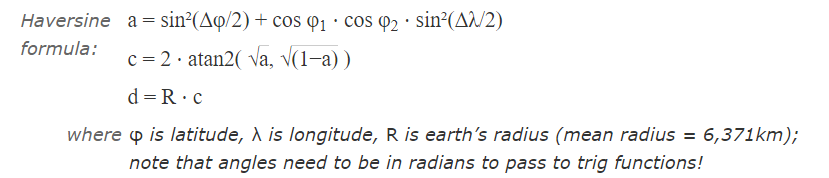

Latitude and longitude values will be first converted into radians and then will be passed into this formula to calculate the distance.

In [ ]:
# this function returns distance in km given longitude and latitude of two locations
def distance_in_km(lat1, lat2, long1, long2):
    # earth radius in km
    R = 6371
    
    # converting latitude to radians
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    phi_diff = math.radians(lat2-lat1)
    
    # converting longitude difference to radians
    lambda_diff = math.radians(long2-long1)
    
    # using Haversine formula for distance calculation
    a = math.sin(phi_diff/2)**2 + math.cos(phi1)*math.cos(phi2) * math.sin(lambda_diff/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    # distance in km
    d = R * c
    
    return d

In [ ]:
# restaurant density within 1 km (all categories and similar category, number will include the restaurant)
restaurants_df['similar_restaurants_density'] = np.nan
restaurants_df['all_restaurants_density'] = np.nan

# relative values for all restaurants within 1 Km
restaurants_df['relative_reviews_count'] = np.nan
restaurants_df['relative_reviews_per_week'] = np.nan
restaurants_df['relative_stars'] = np.nan
restaurants_df['relative_user_stars'] = np.nan
restaurants_df['relative_repeat_users'] = np.nan
restaurants_df['relative_price'] = np.nan

for i, restaurant in restaurants_df.iterrows():
    index_similar = []
    similar_restaurants = 0
    all_restaurants = 0
    relative_reviews_count = []
    relative_reviews_per_week = []
    relative_stars = []
    relative_user_stars = []
    relative_repeat_users = []
    relative_price = []
    
    long_i = restaurant['longitude']
    lat_i = restaurant['latitude']
   
    
    categories = restaurant['categories'].split(',')
    for category in categories:
        category = category.strip()
        if ((category != 'Restaurants') & (category != 'Food')):
            index_similar.append(categories_dict[category])
        
    for j, jrestaurant in restaurants_df.iterrows():
        long_j = jrestaurant['longitude']
        lat_j = jrestaurant['latitude']
         
        # calculate distance in kms
        dist = distance_in_km(lat_i,lat_j,long_i,long_j)
        
        # if less than 1 km add to the list
        if dist <= 1:
            
            
            # check whether list is empty
            if (index_similar != []):
                # check if it's in similar category
                if j in index_similar[0]:
                    # increase similar restaurant density by 1
                    similar_restaurants += 1
                    
            # increase restaurant density by 1 and append values in relative list
            all_restaurants += 1
            relative_reviews_count.append(jrestaurant['review_count'])
            relative_reviews_per_week.append(jrestaurant['reviews_per_week'])
            relative_stars.append(jrestaurant['stars'])
            relative_user_stars.append(jrestaurant['user_stars'])
            relative_repeat_users.append(jrestaurant['repeat_users'])
            relative_price.append(jrestaurant['RestaurantsPriceRange2'])
        
    # restaurant density within 1 km (all categories and similar category)
    restaurants_df.loc[i, 'similar_restaurants_density'] = similar_restaurants
    restaurants_df.loc[i, 'all_restaurants_density'] = all_restaurants

    # relative values for all restaurants within 1 Km
    restaurants_df.loc[i, 'relative_reviews_count'] = (restaurant['review_count']-np.nanmean(relative_reviews_count))/np.nanstd(relative_reviews_count)
    restaurants_df.loc[i, 'relative_reviews_per_week'] = (restaurant['reviews_per_week']-np.nanmean(relative_reviews_per_week))/np.nanstd(relative_reviews_per_week)
    restaurants_df.loc[i, 'relative_stars'] = (restaurant['stars']-np.nanmean(relative_stars))/np.nanstd(relative_stars)
    restaurants_df.loc[i, 'relative_user_stars'] = (restaurant['user_stars']-np.nanmean(relative_user_stars))/np.nanstd(relative_user_stars)
    restaurants_df.loc[i, 'relative_repeat_users'] = (restaurant['repeat_users']-np.nanmean(relative_repeat_users))/np.nanstd(relative_repeat_users)
    restaurants_df.loc[i, 'relative_price'] = (restaurant['RestaurantsPriceRange2']-np.nanmean(relative_price))/np.nanstd(relative_price)
    
    print(i, end='\r')

In [ ]:
# view the dataset
restaurants_df.head(3)

In [ ]:
# check for missing values
restaurants_df.isna().sum()

In [ ]:
# check the data for null values
restaurants_df[restaurants_df['relative_price'].isna()].head(4)

We see NaN values in relative field for the restaurants which represents limited restaurants in the neighborhood. We will drop these rows.

In [ ]:
# drop rows
restaurants_df.dropna(subset=['relative_reviews_per_week', 'relative_stars', 'relative_user_stars', 'relative_repeat_users', 'relative_price'], inplace=True)

In [ ]:
# check for missing values
restaurants_df.isna().sum()

In [ ]:
# reset index
restaurants_df = restaurants_df.reset_index(drop=True)
# check shape of data
restaurants_df.shape

Next step is to drop the following columns as relevant information have been converted and added as a field wherever needed.
1. business_id
2. categories

In [ ]:
restaurants_df.drop(columns=['business_id', 'categories'], inplace=True)

Next, new features added above will be analyzed.

In [ ]:
column_list = ['repeat_users', 'age', 'reviews_per_week', 'reactions_per_week', 'sentiment_score', 'review_length',\
               'user_stars', 'relative_price', 'similar_restaurants_density', 'all_restaurants_density', 'relative_reviews_count',\
               'relative_reviews_per_week', 'relative_stars', 'relative_user_stars', 'relative_repeat_users']

plt.subplots(3,5, figsize=(20,12))
for i in range(len(column_list)):
    plt.subplot(3,5, i+1)
    restaurants_df[restaurants_df['is_open']==1][column_list[i]].plot(kind='hist', color='cornflowerblue', alpha=0.8)
    restaurants_df[restaurants_df['is_open']==0][column_list[i]].plot(kind='hist', color='orange', alpha=0.8)
    plt.title(f'{column_list[i]} Distribution')
    plt.xlabel(column_list[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Repeat users: By looking at the graph above, open restaurants have higher number of repeat customers as compared to closed restaurants.
- Age: As expected, open restaurants have greater age as compared to the closed restaurants. Most restaurants get closed within 5-6 years.
- Reviews per week: Both closed and open restaurants receive 1-2 reviews per week. 
- Reactions per week: This value is almost negligible for both open and closed restaurants. We see one bar for open restaurants whereas for closed restaurants, there is a small variation in the number of reactions per week which shows this value is comparably lower for closed restaurants.
- Sentiment Score: For both closed and open restaurants, sentiment score leans towards the positive side.
- Review length: Review length (number of characters) is greater for closed restaurants as compared to open restaurants.
- User Stars: There is no clear trend in user stars distribution. It appears to be same for closed and open restaurants.
- Relative Price: Relative price range for closed restaurants is higher than the mean value of price for most of the restaurants within 1 km radius.
- Similar Restaurants Density: Probability of restaurant getting closed increases with increase in similar restaurant density which is number of restaurants competing in similar category within 1 km radius.
- All Restaurants Density: There is a higher probability of restaurant getting closed if number of restaurants within 1 km radius are greater than 350.
- Relative Reviews Count: Review count of closed restaurants is less than the mean review count for restaurants within 1 km.
- Relative Reviews per week: Reviews per week for closed restaurants is lower than the open restaurants and the mean value for restaurants within 1 km.
- Relative Stars: Relative stars for closed restaurants is less than the mean value of stars for restaurants within 1 km
- Relative User Stars: This value is balanced on both the sides of the mean value, but the highest number of restaurants have value close to mean value of restaurants within 1 km radius.
- Relative Repeat Users: Most of the closed restaurants have value less than 0 which shows number of repeat users are less compared to other restaurants within 1 km radius.

Final dataset shape will be checked next and dataset will be saved as `restaurants_final.csv` in data folder to be used for training the models and predicting the future of a restaurant along with the essential features most closely related to it's survival.

In [ ]:
# final shape of the dataset
restaurants_df.shape

After all the above EDA and feature engineering, we have 4,660 restaurants and 60 features including our target variable. As a next step, the file will be saved in data folder as csv to be used for Modelling and Model Evaluation in Part 3.

In [ ]:
restaurants_df.to_csv(r'data\restaurants_final.csv', encoding='utf-8', index=False)

We will do Data modelling and model evaluation in **'3_Model_and_Evaluation'** notebook.